## Import libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer
%matplotlib inline
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import functions

def normalize(X):
    '''
    Function for normalizing the columns (variables) of a data matrix to unit length.
    Returns the normalized data and the L2 norm of the variables 
    
    Input  (X) --------> The data matrix to be normalized 
    Output (X_pre)-----> The normalized data matrix 
    Output (d) --------> Array with the L2 norms of the variables 
    '''
    d = np.linalg.norm(X,axis=0,ord=2)  # d is the euclidian lenghts of the variables 
    d[d==0]=1                           # Avoid dividing by zero if column L2 norm is zero 
    X_pre = X / d                       # Normalize the data with the euclidian lengths
    return X_pre,d                      # Return normalized data and the euclidian lengths


def centerData(data):
    
    mu = np.mean(data,axis=0)
    data = data - mu
    
    return data, mu

## Read the train data frame

In [4]:
df = pd.read_csv('case1Data.txt', sep = ",")
df.head()

,y,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,...,x_91,x_92,x_93,x_94,x_95,C_ 1,C_ 2,C_ 3,C_ 4,C_ 5
0,-6.158895,-7.518161,5.423677,11.810360,-19.076321,-7.018273,23.841339,1.050206,3.132453,4.403462,...,3.692902,12.826477,-6.889479,3.443535,5.400120,I,NaN,H,J,K
1,-22.200026,-6.370690,7.792366,11.858663,NaN,-15.420530,21.683970,1.057192,2.559764,NaN,...,7.270303,10.039281,-7.678936,-0.189822,0.717526,H,NaN,H,I,I
2,-19.357551,-4.229569,2.756115,12.446836,-17.567113,-12.984783,NaN,2.484515,NaN,1.852533,...,5.889789,14.186614,-9.527944,0.400832,-2.458897,NaN,I,K,J,G
3,28.763803,-10.487072,1.460685,9.307533,-21.306282,-19.824912,NaN,-0.442587,0.743039,-0.376102,...,7.024105,8.871258,-7.514400,-3.448892,-2.612379,K,H,I,I,NaN
4,43.779898,-13.066517,4.812794,10.641948,-17.691825,NaN,19.057921,1.900578,6.133609,-0.771247,...,8.186575,10.532577,-7.509476,NaN,0.754905,H,H,K,J,J


In [5]:
# Convert all columns from object to numeric data type
df.iloc[:,:-5] = df.apply(pd.to_numeric, errors='coerce')
df.iloc[:,-5:]  = df.iloc[:,-5:] .astype('category')

for col in df.iloc[:,-5:]:    
    df[col].replace({" NaN":np.nan }, inplace=True)

df = pd.get_dummies(df, columns=[' C_ 1', ' C_ 2', ' C_ 3',' C_ 4', ' C_ 5'])
df.head()

,y,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,...,C_ 4_ G,C_ 4_ H,C_ 4_ I,C_ 4_ J,C_ 4_ K,C_ 5_ G,C_ 5_ H,C_ 5_ I,C_ 5_ J,C_ 5_ K
0,-6.158895,-7.518161,5.423677,11.810360,-19.076321,-7.018273,23.841339,1.050206,3.132453,4.403462,...,0,0,0,1,0,0,0,0,0,1
1,-22.200026,-6.370690,7.792366,11.858663,NaN,-15.420530,21.683970,1.057192,2.559764,NaN,...,0,0,1,0,0,0,0,1,0,0
2,-19.357551,-4.229569,2.756115,12.446836,-17.567113,-12.984783,NaN,2.484515,NaN,1.852533,...,0,0,0,1,0,1,0,0,0,0
3,28.763803,-10.487072,1.460685,9.307533,-21.306282,-19.824912,NaN,-0.442587,0.743039,-0.376102,...,0,0,1,0,0,0,0,0,0,0
4,43.779898,-13.066517,4.812794,10.641948,-17.691825,NaN,19.057921,1.900578,6.133609,-0.771247,...,0,0,0,1,0,0,0,0,1,0


In [6]:
imputer = KNNImputer(n_neighbors=4, metric='nan_euclidean')
df.iloc[:,-22:] = imputer.fit_transform(df.iloc[:,-22:])
df.head()

,y,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,...,C_ 4_ G,C_ 4_ H,C_ 4_ I,C_ 4_ J,C_ 4_ K,C_ 5_ G,C_ 5_ H,C_ 5_ I,C_ 5_ J,C_ 5_ K
0,-6.158895,-7.518161,5.423677,11.810360,-19.076321,-7.018273,23.841339,1.050206,3.132453,4.403462,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-22.200026,-6.370690,7.792366,11.858663,NaN,-15.420530,21.683970,1.057192,2.559764,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-19.357551,-4.229569,2.756115,12.446836,-17.567113,-12.984783,NaN,2.484515,NaN,1.852533,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,28.763803,-10.487072,1.460685,9.307533,-21.306282,-19.824912,NaN,-0.442587,0.743039,-0.376102,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,43.779898,-13.066517,4.812794,10.641948,-17.691825,NaN,19.057921,1.900578,6.133609,-0.771247,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
X= df.iloc[:,1:].to_numpy()
y = df['y'].to_numpy()

## Cross-validation for finding the optimal value for Lasso and Ridge Regression

In [8]:
X=X.copy()
y=y.copy()
X_opt = X
y_opt = y

In [9]:
K = 20
CV1 = KFold(K, shuffle=True)

lambda_interval = np.logspace(-9, 9, 50)

test_error_rate_ridge = np.zeros(len(lambda_interval))
test_error_rate_lasso = np.zeros(len(lambda_interval))
test_error_rate_elastic= np.zeros(len(lambda_interval))

for train_index, test_index in CV1.split(X_opt , y_opt):
    
    # extract training and test set for current CV fold
    X_train = X_opt[train_index]
    y_train = y_opt[train_index]
    X_test  = X_opt[test_index]
    y_test  = y_opt[test_index]
    
    for i in range(X_train.shape[1]):
        col_mean = np.nanmean(X_train[:,i])       
        X_train = np.nan_to_num(X_train, nan = col_mean)
    
    for i in range(X_test.shape[1]):
        col_mean = np.nanmean(X_test[:,i])       
        X_test = np.nan_to_num(X_test, nan = col_mean)

    #Normalize
    y_train, mu = centerData(y_train); # center training response
    y_test = y_test-mu; # use the mean value of the training response to center the test response
    
    X_train, mu = centerData(X_train); # center training data
    X_test = X_test-mu; # use the mean value of the training data to center the test data
    
    X_train,d = normalize(X_train) # normalize training data
    X_test = X_test / d # normalize test data using euclidian lengths of train data columns
    
    X_train = np.c_[np.ones(len(X_train)),X_train] 
    
    X_test = np.c_[np.ones(len(X_test)),X_test]
    
    for j in range(0, len(lambda_interval)):
        clf = linear_model.Lasso(alpha = lambda_interval[j], fit_intercept=True , max_iter=100000)
        clf.fit(X_train, y_train)    
        test_error_rate_lasso[j] = np.square(y_test-clf.predict(X_test)).sum(axis=0)/y_test.shape[0]
               
        rdg = linear_model.Ridge(alpha = lambda_interval[j], fit_intercept=True , max_iter=100000)
        rdg.fit(X_train, y_train)    
        test_error_rate_ridge[j] = np.square(y_test-rdg.predict(X_test)).sum(axis=0)/y_test.shape[0]
        
        elastic_net = linear_model.ElasticNet(alpha = lambda_interval[j], fit_intercept=True , max_iter=100000)
        elastic_net.fit(X_train, y_train)
        test_error_rate_elastic[j] = np.square(y_test-elastic_net.predict(X_test)).sum()/y_test.shape[0] 

        
        

#Optimal lambda for lasso
min_error_lasso = np.min(test_error_rate_lasso)
opt_lambda_idx_lasso = np.argmin(test_error_rate_lasso)
opt_lambda_lasso = lambda_interval[opt_lambda_idx_lasso]
        
#Optimal lambda for ridge                
min_error_ridge = np.min(test_error_rate_ridge)
opt_lambda_idx_ridge = np.argmin(test_error_rate_ridge)
opt_lambda_ridge = lambda_interval[opt_lambda_idx_ridge]

#optimal lambda for elastic
min_error_el = np.min(test_error_rate_elastic)
opt_lambda_idx_el = np.argmin(test_error_rate_elastic)
opt_lambda_elastic = lambda_interval[opt_lambda_idx_el]


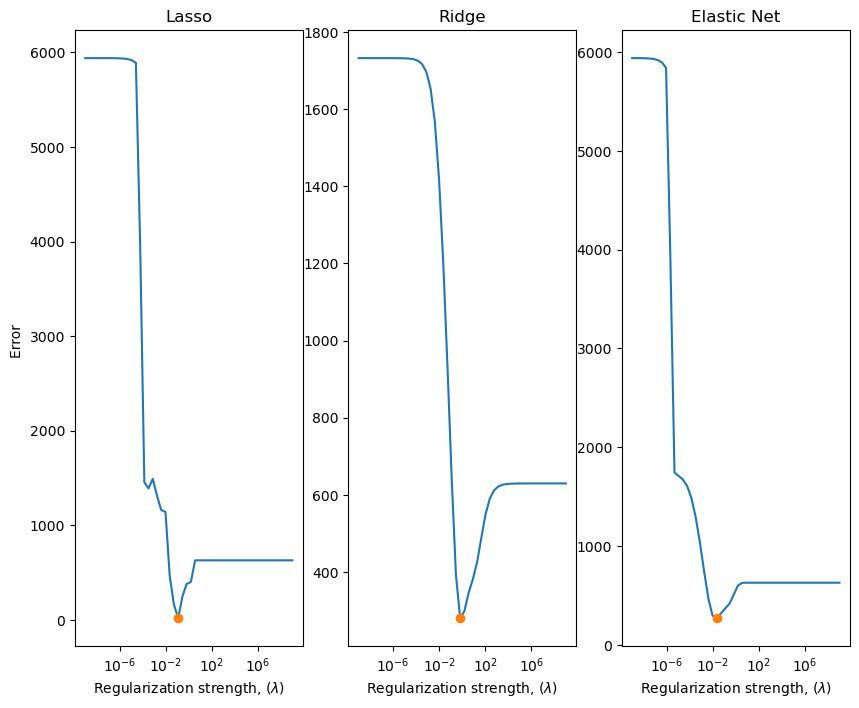

In [10]:
fig, ax = plt.subplots(1,3,figsize=(10,8))
ax[0].semilogx(lambda_interval, test_error_rate_lasso)
ax[0].semilogx(opt_lambda_lasso, min_error_lasso, 'o')
ax[0].set_xlabel('Regularization strength, $(\lambda)$')
ax[0].set_ylabel('Error ')
ax[0].set_title('Lasso')

ax[1].semilogx(lambda_interval, test_error_rate_ridge)
ax[1].semilogx(opt_lambda_ridge, min_error_ridge, 'o')
ax[1].set_xlabel('Regularization strength, $(\lambda)$')
ax[1].set_title('Ridge')
plt.savefig('optimal lamdas.png')

ax[2].semilogx(lambda_interval, test_error_rate_elastic)
ax[2].semilogx(opt_lambda_elastic, min_error_el, 'o')
ax[2].set_xlabel('Regularization strength, $(\lambda)$')
ax[2].set_title('Elastic Net')
plt.savefig('optimal lamdas.png')
plt.show()  

In [11]:
print('the optimal value of lambda for lasso regresion is: ' + str(opt_lambda_lasso) )
print('the optimal value of lambda for ridge regresion is: ' + str(opt_lambda_ridge) )
print('the optimal value of lambda for elastic net is: '     + str(opt_lambda_elastic) )

the optimal value of lambda for lasso regresion is: 0.12067926406393313
the optimal value of lambda for ridge regresion is: 0.6551285568595523
the optimal value of lambda for elastic net is: 0.022229964825261957


## Cross Validation for finding the optimal Model 

In [12]:
K = 20
CV1 = KFold(K, shuffle=True)
Error_test_baseline = np.empty((K))
Error_test_lasso    = np.empty((K))
Error_test_ridge    = np.empty((K))
Error_test_elastic  = np.empty((K))

for k, (train_index, test_index) in enumerate(CV1.split(X,y)):
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    
    for i in range(X_train.shape[1]):
        col_mean = np.nanmean(X_train[:,i])       
        X_train = np.nan_to_num(X_train, nan = col_mean)

    for i in range(X_test.shape[1]):
        col_mean = np.nanmean(X_test[:,i])       
        X_test = np.nan_to_num(X_test, nan = col_mean)
        
    #Normalize
    y_train, mu = centerData(y_train); # center training response
    y_test = y_test-mu; # use the mean value of the training response to center the test response
    
    X_train, mu = centerData(X_train); # center training data
    X_test = X_test-mu; # use the mean value of the training data to center the test data
    
    X_train,d = normalize(X_train) # normalize training data
    X_test = X_test / d # normalize test data using euclidian lengths of train data columns
    
    X_train = np.c_[np.ones(len(X_train)),X_train] 
    
    X_test = np.c_[np.ones(len(X_test)),X_test]
    
################################ BASELINE MODEL ##################################
    regr=linear_model.LinearRegression(fit_intercept = True).fit(X_train, y_train)
    Error_test_baseline[k] = np.square(y_test-regr.predict(X_test)).sum()/y_test.shape[0]

################################ LASSO MODEL ##################################
    clf = linear_model.Lasso(alpha = opt_lambda_lasso, fit_intercept=True , max_iter=100000).fit(X_train, y_train) 
    Error_test_lasso[k]   = np.square(y_test-clf.predict(X_test)).sum()/y_test.shape[0]
    
################################ RIDGE MODEL ##################################        
    rdg = linear_model.Ridge(alpha = opt_lambda_ridge, fit_intercept=True , max_iter=100000).fit(X_train, y_train)
    Error_test_ridge[k] = np.square(y_test-rdg.predict(X_test)).sum()/y_test.shape[0]   
    
################################ ELASTIC NET MODEL ##################################   
    el_net = linear_model.ElasticNet(alpha = opt_lambda_elastic, fit_intercept=True , max_iter=100000).fit(X_train, y_train)
    Error_test_elastic[k] = np.square(y_test-el_net.predict(X_test)).sum()/y_test.shape[0] 

                
error_test_mean_baseline = np.mean(Error_test_baseline)
error_test_mean_lasso    = np.mean(Error_test_lasso)
error_test_mean_ridge    = np.mean(Error_test_ridge)
error_test_mean_elastic  = np.mean(Error_test_elastic)

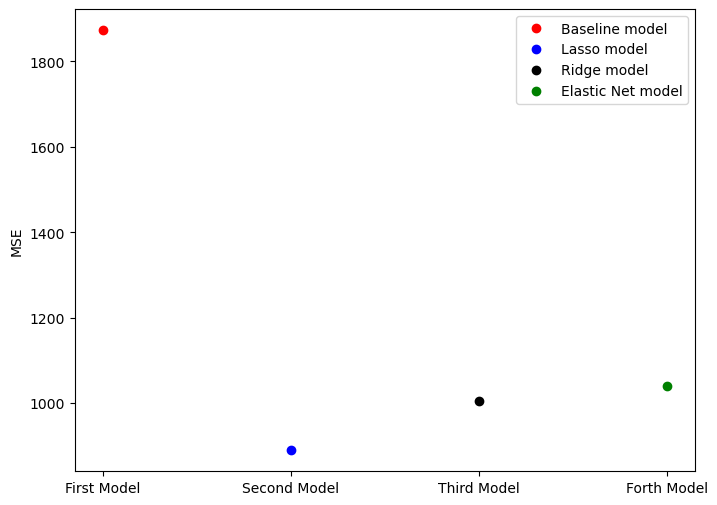

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(1, error_test_mean_baseline ,'ro',label='Baseline model')
ax.plot(2,error_test_mean_lasso ,'bo',label='Lasso model')
ax.plot(3,error_test_mean_ridge ,'ko',label='Ridge model')
ax.plot(4,error_test_mean_elastic ,'go',label='Elastic Net model')
#plt.xlabel('models')
ax.set_ylabel('MSE')
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['First Model','Second Model','Third Model', 'Forth Model'])
#ax.set_xticks(rotation=30, ha='right')
plt.legend()
plt.savefig('4models.png')

## Calculating of  RMSE for the best model

In [14]:
for i in range(X.shape[1]):
    col_mean = np.nanmean(X[:,i])       
    X = np.nan_to_num(X, nan = col_mean)

In [15]:
mod_lasso = linear_model.Lasso(alpha = opt_lambda_lasso, fit_intercept=True , max_iter=100000)
mod_lasso.fit(X, y)
y_pred = mod_lasso.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
rmse = np.round(rmse,3)
print('The RMSE is: ' + str(rmse) )

The RMSE is: 2.933


In [16]:
# open a text file for writing
with open('estimatedRMSE_s212887_s223001.txt', 'w') as f:
    f.write(str(rmse) + '\n')

## Import test data

In [17]:
df1 = pd.read_csv('case1Data_Xnew.txt', sep = ",")
df1.head()

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,...,x_91,x_92,x_93,x_94,x_95,C_ 1,C_ 2,C_ 3,C_ 4,C_ 5
0,-6.493200,4.857913,12.334877,-17.075041,NaN,NaN,5.339252,NaN,-0.275014,NaN,...,6.983981,14.086256,NaN,3.391461,2.102585,G,I,G,J,NaN
1,-6.688701,6.402298,13.321841,-14.890575,-15.208925,22.978112,-3.424436,2.773030,1.326065,-2.664610,...,5.799896,11.477398,-10.509565,-0.347968,-2.471949,I,I,NaN,NaN,H
2,-8.507726,1.639164,NaN,-19.167274,-15.745444,20.336708,NaN,NaN,2.756582,-6.619169,...,9.498865,NaN,-6.555100,-3.588808,-2.342992,NaN,H,NaN,H,K
3,-12.841493,NaN,11.307615,-22.689726,-17.290155,20.984080,-1.775278,2.554297,0.315108,-4.498758,...,8.428060,12.257391,-8.267102,-1.373772,-5.374916,G,H,K,K,J
4,-8.555160,NaN,13.122784,-12.977789,-14.144455,24.086075,6.270027,2.181681,6.731993,NaN,...,11.065901,8.004617,-10.170813,2.445537,NaN,H,I,J,H,G


In [18]:
# Convert all columns from object to numeric data type
df1.iloc[:,:-5] = df1.apply(pd.to_numeric, errors='coerce')
df1.iloc[:,-5:]  = df1.iloc[:,-5:] .astype('category')

df1 = df1.fillna(df1.mean())

df1 = pd.get_dummies(df1, columns=[' C_ 1', ' C_ 2', ' C_ 3',
       ' C_ 4', ' C_ 5'], drop_first = True)

imputer = KNNImputer(n_neighbors=4, metric='nan_euclidean')
df1.iloc[:,-22:] = imputer.fit_transform(df1.iloc[:,-22:])
df1.head()

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,...,C_ 4_ H,C_ 4_ I,C_ 4_ J,C_ 4_ K,C_ 4_ NaN,C_ 5_ H,C_ 5_ I,C_ 5_ J,C_ 5_ K,C_ 5_ NaN
0,-6.493200,4.857913,12.334877,-17.075041,-14.339100,23.791038,5.339252,5.103705,-0.275014,-3.910894,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-6.688701,6.402298,13.321841,-14.890575,-15.208925,22.978112,-3.424436,2.773030,1.326065,-2.664610,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-8.507726,1.639164,12.793980,-19.167274,-15.745444,20.336708,2.799327,5.103705,2.756582,-6.619169,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-12.841493,5.780583,11.307615,-22.689726,-17.290155,20.984080,-1.775278,2.554297,0.315108,-4.498758,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-8.555160,5.780583,13.122784,-12.977789,-14.144455,24.086075,6.270027,2.181681,6.731993,-3.910894,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
X_new = df1.to_numpy()

## Fit the model to the test data

In [20]:
y_pred_new = mod_lasso.predict(X_new)

In [21]:
y_pred_new

array([-4.07923435e+00,  5.15202471e+01,  2.55210067e+01,  9.80684393e+00,
        2.22367303e+01,  7.53007961e+01,  2.10677100e+01,  1.72889321e+01,
       -1.03157583e+00,  6.77429077e+01,  1.22340472e+00,  7.80478184e+01,
        4.63135937e+01,  3.54185787e+01,  1.36606543e+01,  3.49674514e+01,
       -3.63920872e+01,  5.36492895e+01, -1.23091991e+01,  5.85708986e+01,
       -8.47974294e+00, -7.33547922e+01, -2.85431953e+01,  8.76963834e+00,
       -4.83624424e+01,  8.16701483e+01,  6.77979759e+01,  6.83514751e+01,
        1.76548750e+01,  9.56457475e+01, -2.67366433e+00, -2.04322493e+01,
       -7.24802065e+01, -2.16288647e+01,  4.09939233e+01,  9.44645128e+00,
        2.37228193e+01,  5.14223965e+01, -4.12369220e+01,  1.54627071e+01,
       -1.28512327e+01,  7.62019689e+01,  5.31647101e+01, -7.14666459e+00,
       -2.13610005e+01,  6.76644239e+01, -4.27975064e+01,  6.38623027e+01,
        2.35091421e+01,  3.58887883e+01,  3.97823041e+01, -9.61727090e+01,
        3.37194513e+01, -

In [22]:
# open a text file for writing
with open('predictions_s212887_s223001.txt', 'w') as f:
    # iterate over the values and write each one to a new line in the file
    for val in y_pred_new:
        f.write(str(val) + '\n')